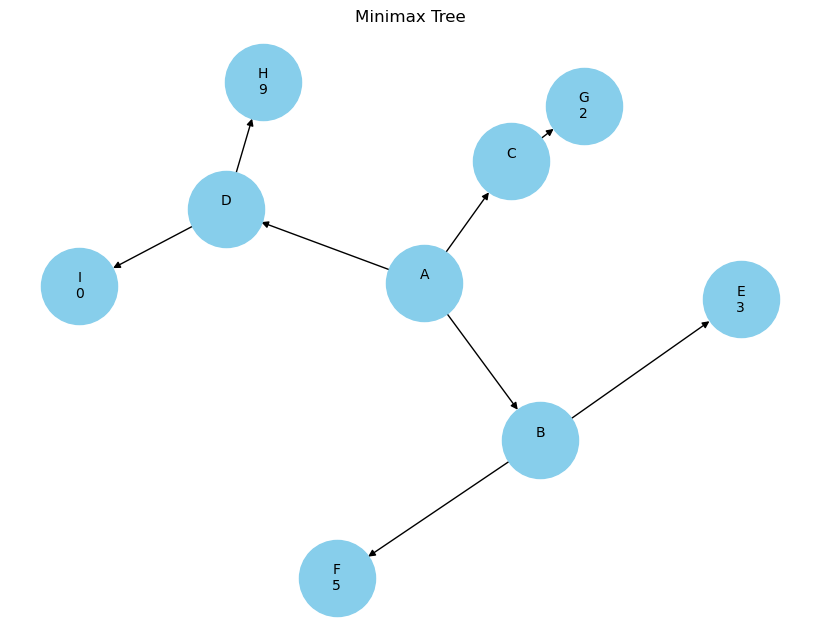

Optimal value at root (A): 3


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a tree
G = nx.DiGraph()

# Adding nodes and edges
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('C', 'G'),
    ('D', 'H'), ('D', 'I')
])

# Adding scores to leaf nodes
scores = {'E': 3, 'F': 5, 'G': 2, 'H': 9, 'I': 0}
for node, score in scores.items():
    G.nodes[node]['score'] = score


def minimax(node, maximizing):
    if 'score' in G.nodes[node]:  # Terminal node
        return G.nodes[node]['score']

    children = list(G.successors(node))

    if maximizing:  # Maximizer's turn
        return max(minimax(child, False) for child in children)
    else:  # Minimizer's turn
        return min(minimax(child, True) for child in children)


def draw_tree():
    labels = {node: f'{node}\n{G.nodes[node].get("score", "")}' for node in G.nodes}

    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", font_size=10)
    plt.title("Minimax Tree")
    plt.show()


# Draw the tree
draw_tree()

# Apply Minimax algorithm
optimal_value = minimax('A', True)
print(f'Optimal value at root (A): {optimal_value}')


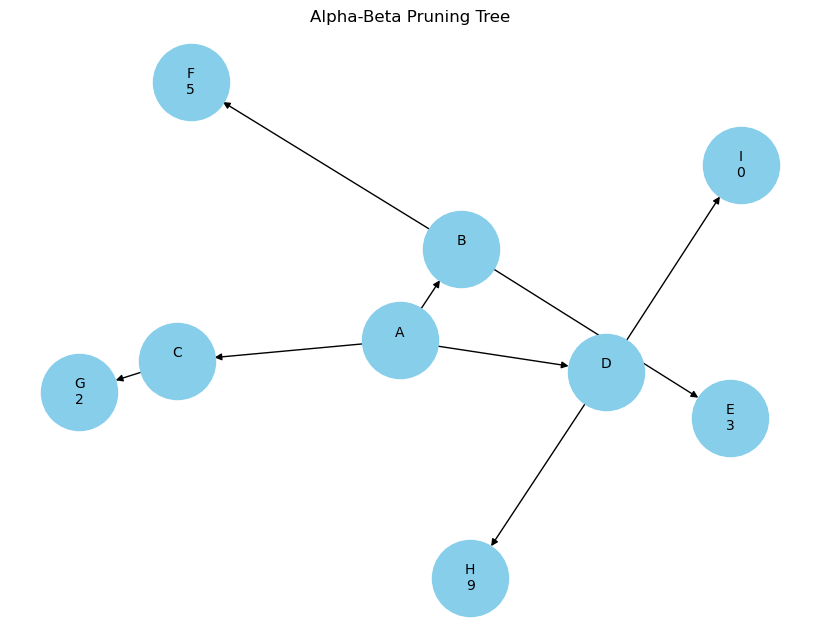

Optimal value at root (A): 3


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a tree
G = nx.DiGraph()

# Adding nodes and edges
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('C', 'G'),
    ('D', 'H'), ('D', 'I')
])

# Adding scores to leaf nodes
scores = {'E': 3, 'F': 5, 'G': 2, 'H': 9, 'I': 0}
for node, score in scores.items():
    G.nodes[node]['score'] = score


def alphabeta(node, maximizing, alpha, beta):
    if 'score' in G.nodes[node]:  # Terminal node
        return G.nodes[node]['score']

    children = list(G.successors(node))

    if maximizing:  # Maximizer's turn
        max_eval = float('-inf')
        for child in children:
            eval = alphabeta(child, False, alpha, beta)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            
            if beta <= alpha:  # Prune
                break
        return max_eval
    else:  # Minimizer's turn
        min_eval = float('inf')
        for child in children:
            eval = alphabeta(child, True, alpha, beta)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            
            if beta <= alpha:  # Prune
                break
        return min_eval


def draw_tree():
    labels = {node: f'{node}\n{G.nodes[node].get("score", "")}' for node in G.nodes}

    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", font_size=10)
    plt.title("Alpha-Beta Pruning Tree")
    plt.show()


# Draw the tree
draw_tree()

# Apply Alpha-Beta Pruning
optimal_value = alphabeta('A', True, float('-inf'), float('inf'))
print(f'Optimal value at root (A): {optimal_value}')
